In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [70]:
OUT_DIR = Path('processed')
df = pd.read_csv(OUT_DIR / 'processed_farmer_data.csv')
print(df.head())

         Date  price_avg    temp_c  precip_mm  wind_m_s    rh_pct  Harvest_kg  \
0  2013-06-16   0.176744  0.507131   0.000159  0.296741  0.578778    0.063594   
1  2013-06-17   0.116279  0.471151   0.000043  0.304174  0.586001    0.063594   
2  2013-06-18   0.130233  0.360130   0.000000  0.348199  0.669953    0.468140   
3  2013-06-19   0.148837  0.319935   0.000014  0.296741  0.584425    0.130158   
4  2013-06-20   0.130233  0.345219   0.000014  0.332190  0.586145    0.585106   

   Price_index temp_category precip_category    source  
0     0.144591      Moderate             Low  Original  
1     0.144591      Moderate             Low  Original  
2     0.516175      Moderate             Low  Original  
3     0.500137          Cool             Low  Original  
4     0.393231      Moderate             Low  Original  


In [71]:
X = df[['temp_c', 'precip_mm', 'wind_m_s', 'rh_pct', 'Harvest_kg', 'Price_index']]
y = df['price_avg']

# Optional: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,  # number of trees
    max_depth=10,      # max depth to avoid overfitting
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [73]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.16
R² Score: 0.10


In [75]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load data
OUT_DIR = Path('processed')
df = pd.read_csv(OUT_DIR / 'processed_farmer_data.csv')

# Select features
X = df[['temp_c', 'precip_mm', 'wind_m_s', 'rh_pct', 'Harvest_kg', 'Price_index']]
y = df['price_avg']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rmse_list = []
r2_list = []

print("Running RandomForest for 10 rounds...\n")

for i in range(10):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=i
    )

    # Model
    rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        random_state=i
    )
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"Round {i+1}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

# Final averages
print("\n===== FINAL AVERAGE RESULTS (10 ROUNDS) =====")
print(f"Average RMSE: {np.mean(rmse_list):.2f}")
print(f"Average R²: {np.mean(r2_list):.2f}")


Running RandomForest for 10 rounds...

Round 1: RMSE = 0.15, R² = 0.09
Round 2: RMSE = 0.15, R² = 0.10
Round 3: RMSE = 0.16, R² = 0.08
Round 4: RMSE = 0.16, R² = 0.11
Round 5: RMSE = 0.15, R² = 0.10
Round 6: RMSE = 0.15, R² = 0.09
Round 7: RMSE = 0.16, R² = 0.10
Round 8: RMSE = 0.15, R² = 0.10
Round 9: RMSE = 0.16, R² = 0.08
Round 10: RMSE = 0.16, R² = 0.11

===== FINAL AVERAGE RESULTS (10 ROUNDS) =====
Average RMSE: 0.16
Average R²: 0.10



Key factors influencing price_avg:
       Feature  Importance
0       temp_c    0.221499
2     wind_m_s    0.199570
3       rh_pct    0.186617
4   Harvest_kg    0.142686
5  Price_index    0.141200
1    precip_mm    0.108429


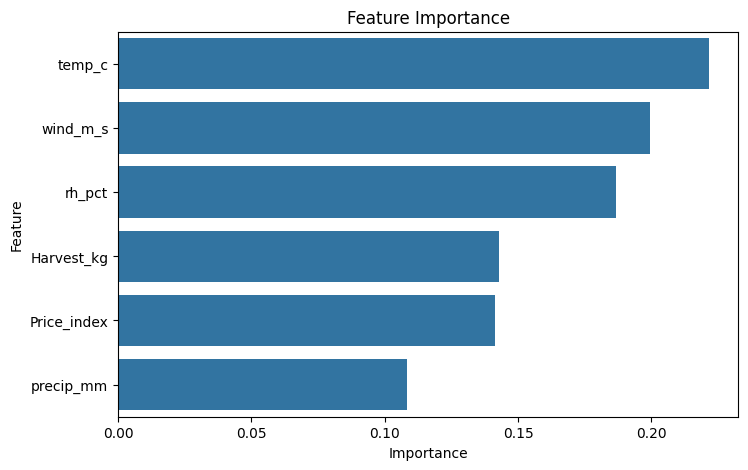

In [74]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nKey factors influencing price_avg:")
print(feature_importance)

# Optional: visualize
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()
